In [124]:
# Common imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
%matplotlib inline

In [125]:
p=open(u'C:/Локальные документы/HW/ML/data_breast.csv')
data=pd.read_csv(p,encoding='cp1251')
p.close()

In [126]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [187]:
#убираем пробелы в названиях
col44=[]
for x in range(len(data.columns)):
    col44.append(data.columns[x].replace(' ', '_'))
data.columns=col44

In [188]:
#Убираем столбец с NaN
col33=data.columns.drop(['Unnamed:_32'])
data=data[col33]

In [135]:
#Заменяем буквы на числа
data['diagnosis']=data['diagnosis'].apply(lambda row:1 if row=='B' else 0)

In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [127]:
# Основные метрики переменных
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:_32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


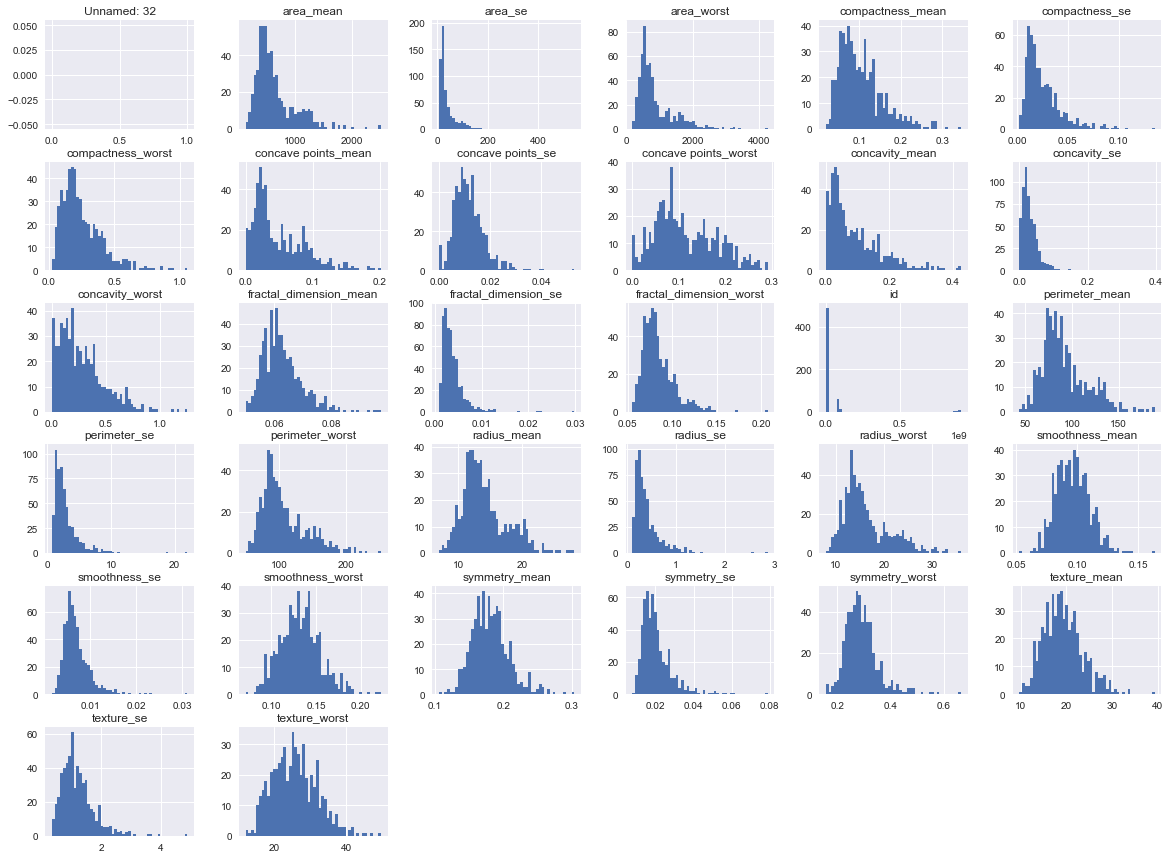

In [6]:
_ = data.hist(bins=50, figsize=(20,15))

In [80]:
corr = data.corr()

In [81]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,15

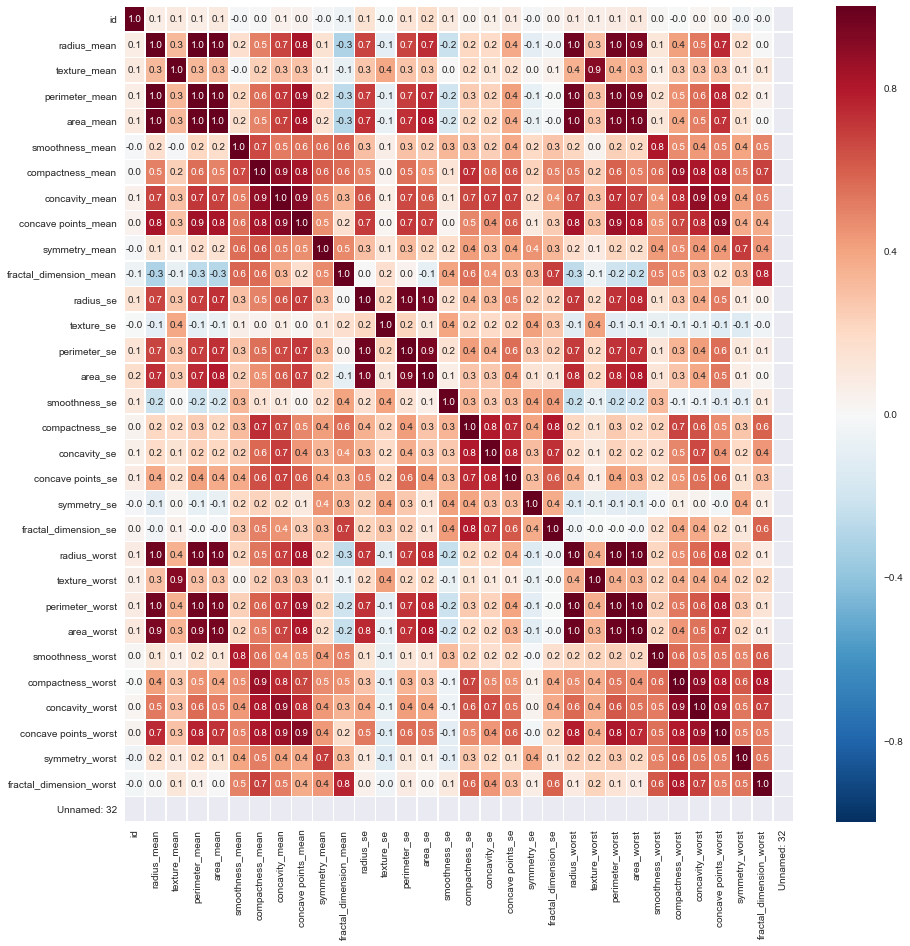

In [82]:
sns.heatmap(corr, annot=True, fmt=".1f", 
            linewidths=0.5);

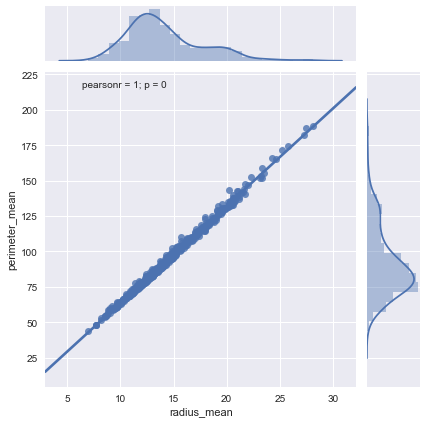

In [83]:
sns.jointplot(x='radius_mean', y='perimeter_mean',data=data, kind='reg');

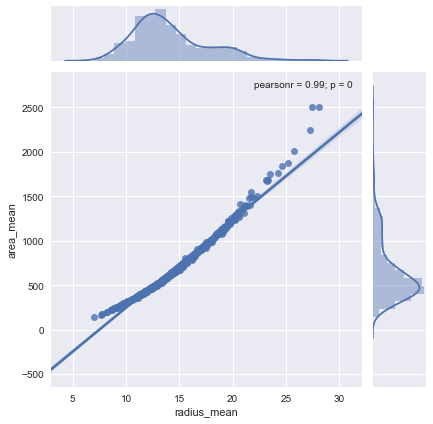

In [84]:
sns.jointplot(x='radius_mean', y='area_mean',data=data, kind='reg');

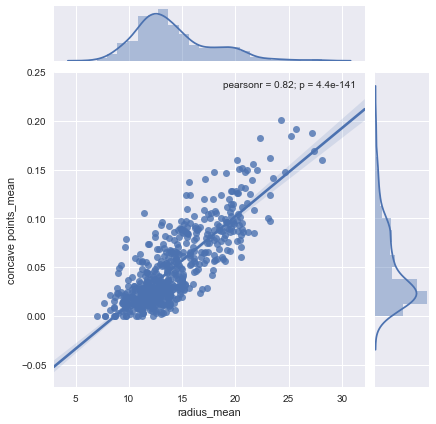

In [85]:
sns.jointplot(x='radius_mean', y='concave points_mean',data=data, kind='reg');

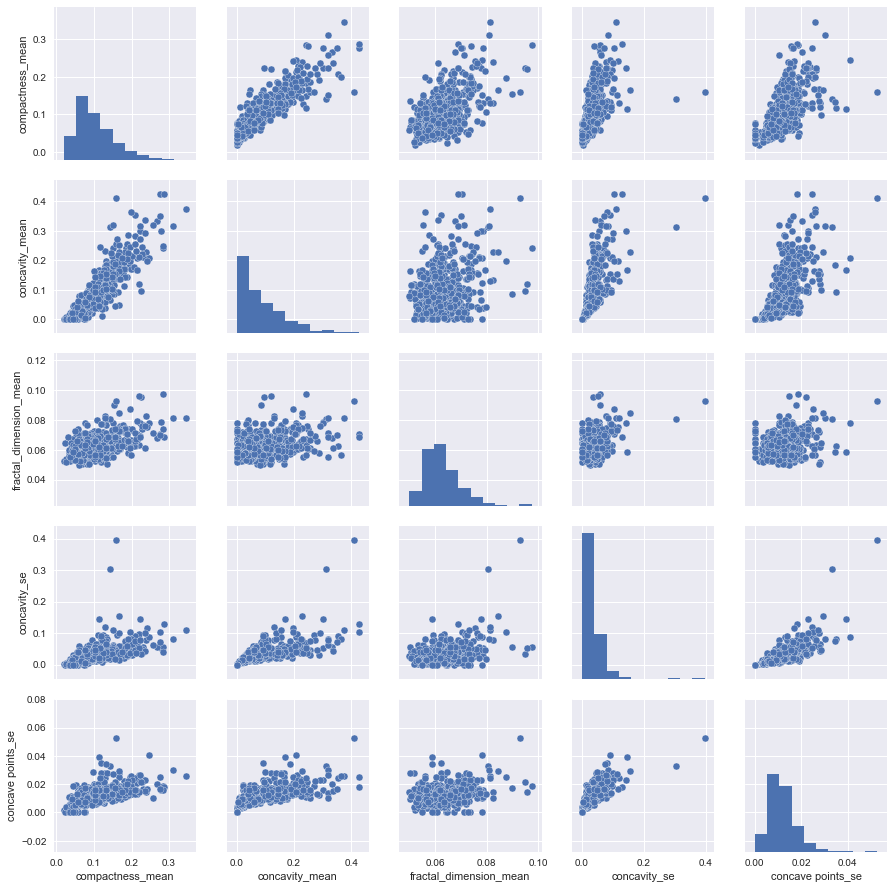

In [86]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    data[['compactness_mean', 'concavity_mean', 'fractal_dimension_mean','concavity_se','concave points_se']]);
sns_plot.savefig('pairplot.png')

In [136]:
df = pd.DataFrame()

In [138]:
#Нормализация числовых столбцов
for x in data.columns:
    if data[x].dtypes=='float64':
        df[x+'_norm']=(data[x] - data[x].mean())/(data[x].max() - data[x].min())
    else: df[x]=data[x]

In [139]:
from sklearn.model_selection import StratifiedShuffleSplit
rrr = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [140]:
for train_index, test_index in rrr.split(df, df["diagnosis"]):

    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [141]:
X_train = strat_train_set.drop("diagnosis", axis=1).fillna(0)
y_train = strat_train_set["diagnosis"].copy().fillna(0)

X_test = strat_test_set.drop("diagnosis", axis=1).fillna(0)
y_test = strat_test_set["diagnosis"].copy().fillna(0)

In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.25505481153516152

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

lin_reg = Lasso().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.48686091114358115

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

lin_reg = Ridge().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.26719278383953698

Выбор ФИЧ

In [145]:
columns = [
    'radius_mean_norm','texture_mean_norm','perimeter_mean_norm','compactness_mean_norm',
    'fractal_dimension_mean_norm','perimeter_se_norm','compactness_se_norm',
    'symmetry_se_norm','texture_worst_norm','smoothness_worst_norm',
    'concavity_worst_norm','symmetry_worst_norm','area_mean_norm',
    'concavity_mean_norm','symmetry_mean_norm','area_se_norm',
    'radius_se_norm','concavity_se_norm','fractal_dimension_se_norm',
    'perimeter_worst_norm','compactness_worst_norm','fractal_dimension_worst_norm',
    'radius_mean_norm','smoothness_mean_norm','texture_se_norm','smoothness_se_norm',
    'radius_worst_norm','area_worst_norm'
]



Итерация 0

In [152]:
three_x_lm = smf.ols('diagnosis ~ radius_mean_norm+texture_mean_norm+perimeter_mean_norm+compactness_mean_norm+fractal_dimension_mean_norm+perimeter_se_norm+compactness_se_norm+symmetry_se_norm+texture_worst_norm+smoothness_worst_norm+concavity_worst_norm+symmetry_worst_norm+area_mean_norm+concavity_mean_norm+symmetry_mean_norm+area_se_norm+radius_se_norm+concavity_se_norm+fractal_dimension_se_norm+perimeter_worst_norm+compactness_worst_norm+fractal_dimension_worst_norm+radius_mean_norm+smoothness_mean_norm+texture_se_norm+smoothness_se_norm+radius_worst_norm+area_worst_norm', strat_train_set).fit()
rss = np.sum(three_x_lm.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set.shape[0] - 27 - 1)))

print("R^2:", three_x_lm.rsquared)

RSS: 24.25239125855355
RSE: 0.238321566846
R^2: 0.772242765271


In [153]:
lm_res = three_x_lm.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6242,0.011,55.578,0.000,0.602,0.646
radius_mean_norm,0.4395,4.163,0.106,0.916,-7.744,8.623
texture_mean_norm,-0.1769,0.262,-0.675,0.500,-0.692,0.338
perimeter_mean_norm,-0.7004,4.137,-0.169,0.866,-8.832,7.432
compactness_mean_norm,1.2853,0.508,2.532,0.012,0.288,2.283
fractal_dimension_mean_norm,-0.1082,0.295,-0.367,0.714,-0.688,0.471
perimeter_se_norm,-0.4612,0.921,-0.501,0.617,-2.272,1.349
compactness_se_norm,-0.1169,0.315,-0.371,0.711,-0.737,0.503
symmetry_se_norm,0.0991,0.214,0.463,0.644,-0.322,0.520
texture_worst_norm,-0.2222,0.291,-0.765,0.445,-0.793,0.349


Итерация 1

In [154]:
three_x_lm1 = smf.ols('diagnosis ~compactness_mean_norm+concavity_mean_norm+area_se_norm+concavity_se_norm+fractal_dimension_worst_norm+smoothness_se_norm+radius_worst_norm+area_worst_norm', df).fit()
rss = np.sum(three_x_lm1.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (df.shape[0] - 8 - 1)))
print("R^2:", three_x_lm1.rsquared)

RSS: 36.00397781277728
RSE: 0.253560283804
R^2: 0.72931843751


In [155]:
lm_res = three_x_lm1.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6274,0.011,59.024,0.000,0.607,0.648
compactness_mean_norm,0.9595,0.185,5.180,0.000,0.596,1.323
concavity_mean_norm,-1.3418,0.205,-6.532,0.000,-1.745,-0.938
area_se_norm,-0.1663,0.258,-0.644,0.520,-0.674,0.341
concavity_se_norm,1.2665,0.243,5.212,0.000,0.789,1.744
fractal_dimension_worst_norm,-1.1337,0.147,-7.722,0.000,-1.422,-0.845
smoothness_se_norm,-0.6918,0.125,-5.515,0.000,-0.938,-0.445
radius_worst_norm,-5.1567,0.427,-12.075,0.000,-5.995,-4.318
area_worst_norm,4.2783,0.548,7.814,0.000,3.203,5.354


Итерация 2

In [61]:
three_x_lm2 = smf.ols('diagnosis ~compactness_mean_norm+concavity_mean_norm+concavity_se_norm+fractal_dimension_worst_norm+smoothness_se_norm+radius_worst_norm+area_worst_norm', df).fit()
rss = np.sum(three_x_lm2.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (df.shape[0] - 7 - 1)))
print("R^2:", three_x_lm2.rsquared)

RSS: 28.838046442717893
RSE: 0.253997333226
R^2: 0.729178304821


In [51]:
lm_res = three_x_lm2.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6264,0.012,52.603,0.000,0.603,0.650
compactness_mean_norm,0.9120,0.215,4.235,0.000,0.489,1.335
concavity_mean_norm,-1.2691,0.233,-5.451,0.000,-1.727,-0.812
concavity_se_norm,1.1966,0.261,4.588,0.000,0.684,1.709
fractal_dimension_worst_norm,-1.1387,0.157,-7.249,0.000,-1.447,-0.830
smoothness_se_norm,-0.7011,0.134,-5.246,0.000,-0.964,-0.438
radius_worst_norm,-4.8312,0.434,-11.133,0.000,-5.684,-3.978
area_worst_norm,3.5699,0.451,7.908,0.000,2.683,4.457


In [167]:
col=['compactness_mean_norm','concavity_mean_norm','concavity_se_norm','fractal_dimension_worst_norm','smoothness_se_norm','radius_worst_norm','area_worst_norm']
sub_X_train_prepared = X_train[col]
sub_X_test_prepared = X_test[col]

In [168]:
lin_reg = LinearRegression().fit(sub_X_train_prepared, y_train)
y_pred = lin_reg.predict(sub_X_test_prepared)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.25276355036945025

In [54]:
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn import preprocessing

In [23]:
res1=data['compactness_mean_norm']
res2=data['concavity_mean_norm']
stats.ttest_ind(res1,res2)

KeyError: 'compactness_mean_norm'

In [14]:
ttest_ind(res1,res2)

Ttest_indResult(statistic=-1.2800746587330936e-14, pvalue=0.99999999999998979)

In [15]:
stats.ttest_rel(res1,res2)

Ttest_relResult(statistic=-3.4291699911253749e-14, pvalue=0.99999999999997269)

In [16]:
res1.mean()

-1.8199657754290242e-16

In [17]:
res2.mean()

-4.1901651061204285e-17

In [192]:
#для первичных переменных
df2 = pd.DataFrame()
#для вторичных переменных
df3 = pd.DataFrame()

In [198]:
data2=data


In [201]:
len(data2.id)

569

In [199]:
#Добавляем производные параметры
#перемножаем значения столбцов
t=0
b=[]
for x in range(len(data2.columns)-1):
    if data2[data2.columns[x]].dtypes=='float64':        
        for j in range(len(data2.columns)):
            if x+j+1<len(data2.columns):
                if data2[data2.columns[x+j+1]].dtypes=='float64':    
                            
                    df3[data2.columns[x]+str("_")+data2.columns[x+j+1]+str("_")+str(t)]=(data2[data2.columns[x]]*data2[data2.columns[x+j+1]])
                    t=t+1
    else: df3[data2.columns[x]]=data2[data2.columns[x]]
 

In [200]:
df3.head()

,id,diagnosis,radius_mean_texture_mean_0,radius_mean_perimeter_mean_1,radius_mean_area_mean_2,radius_mean_smoothness_mean_3,radius_mean_compactness_mean_4,radius_mean_concavity_mean_5,radius_mean_concave_points_mean_6,radius_mean_symmetry_mean_7,...,compactness_worst_concavity_worst_425,compactness_worst_concave_points_worst_426,compactness_worst_symmetry_worst_427,compactness_worst_fractal_dimension_worst_428,concavity_worst_concave_points_worst_429,concavity_worst_symmetry_worst_430,concavity_worst_fractal_dimension_worst_431,concave_points_worst_symmetry_worst_432,concave_points_worst_fractal_dimension_worst_433,symmetry_worst_fractal_dimension_worst_434
0,842302,0,186.7362,2209.1720,18007.990,2.130016,4.994024,5.398799,2.646329,4.351781,...,0.473841,0.176650,0.306243,0.079140,0.188938,0.327545,0.084645,0.122111,0.031556,0.054706
1,842517,0,365.5289,2733.7530,27275.820,1.743102,1.617625,1.787533,1.443397,3.727284,...,0.045083,0.034708,0.051315,0.016611,0.044938,0.066440,0.021507,0.051150,0.016558,0.024481
2,84300903,0,418.4125,2559.7000,23687.070,2.158024,3.148431,3.886806,2.518351,4.073861,...,0.191195,0.103153,0.153372,0.037178,0.109447,0.162730,0.039446,0.087796,0.021282,0.031643
3,84348301,0,232.7396,885.9636,4409.262,1.627350,3.242138,2.756788,1.201384,2.965774,...,0.595061,0.223072,0.575050,0.149870,0.176877,0.455964,0.118834,0.170928,0.044548,0.114837
4,84358402,0,290.9586,2741.1790,26316.130,2.035087,2.694512,4.017420,2.116247,3.670461,...,0.082000,0.033313,0.048462,0.015740,0.065000,0.094560,0.030712,0.038415,0.012477,0.018151


In [202]:
#Нормализация числовых столбцов
df4=pd.DataFrame()
for x in df3.columns:
    if df3[x].dtypes=='float64':
        df4[x+'_norm']=(df3[x] - df3[x].mean())/(df3[x].max() - df3[x].min())
    else: df4[x]=df3[x]

In [217]:
df5=pd.DataFrame()
col=['id','compactness_mean_norm','concavity_mean_norm','concavity_se_norm','fractal_dimension_worst_norm','smoothness_se_norm','radius_worst_norm','area_worst_norm']

df5=df[col]

In [246]:
join_second=df4.merge(df5,on='id')

In [219]:
join_second.head()

,id,diagnosis,radius_mean_texture_mean_0_norm,radius_mean_perimeter_mean_1_norm,radius_mean_area_mean_2_norm,radius_mean_smoothness_mean_3_norm,radius_mean_compactness_mean_4_norm,radius_mean_concavity_mean_5_norm,radius_mean_concave_points_mean_6_norm,radius_mean_symmetry_mean_7_norm,...,concave_points_worst_symmetry_worst_432_norm,concave_points_worst_fractal_dimension_worst_433_norm,symmetry_worst_fractal_dimension_worst_434_norm,compactness_mean_norm,concavity_mean_norm,concavity_se_norm,fractal_dimension_worst_norm,smoothness_se_norm,radius_worst_norm,area_worst_norm
0,842302,0,-0.144714,0.165150,0.108800,0.245203,0.508123,0.382082,0.360522,0.337395,...,0.507967,0.465128,0.280120,0.531437,0.495081,0.055142,0.229268,-0.021823,0.324113,0.279792
1,842517,0,0.140638,0.270213,0.242641,0.120414,0.007347,0.033164,0.125202,0.218904,...,0.092819,0.138064,-0.004425,-0.078833,-0.004450,-0.033570,0.033282,-0.061732,0.310239,0.264308
2,84300903,0,0.225040,0.235354,0.190814,0.254236,0.234391,0.235994,0.335486,0.284663,...,0.307213,0.241084,0.063000,0.170416,0.254453,0.016228,0.023837,-0.030288,0.259723,0.203602
3,84348301,0,-0.071293,-0.099860,-0.087586,0.083082,0.248289,0.126813,0.077860,0.074415,...,0.793572,0.748428,0.846204,0.550761,0.357546,0.062415,0.584115,0.070334,-0.048353,-0.076898
4,84358402,0,0.021624,0.271700,0.228781,0.214586,0.167067,0.248614,0.256826,0.208122,...,0.018315,0.049072,-0.064014,0.087292,0.255859,0.063097,-0.047001,0.151240,0.223081,0.170669


In [220]:
col45=join_second.columns.drop(['id'])
join_second=join_second[col45]

In [221]:
from sklearn.model_selection import StratifiedShuffleSplit
rrr = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [222]:
for train_index, test_index in rrr.split(join_second, join_second["diagnosis"]):
 #   print("TRAIN:", train_index, "TEST:", test_index)
    strat_train_set2 = join_second.loc[train_index]
    strat_test_set2 = join_second.loc[test_index]


In [223]:
X_train2 = strat_train_set2.drop("diagnosis", axis=1).fillna(0)
y_train2 = strat_train_set2["diagnosis"].copy().fillna(0)

X_test2 = strat_test_set2.drop("diagnosis", axis=1).fillna(0)
y_test2 = strat_test_set2["diagnosis"].copy().fillna(0)

In [224]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.25505481153516152

In [225]:
def get_formula(_cols):
    return 'diagnosis ~ ' + " + ".join(_cols)

In [227]:
_iteration_cols = strat_train_set2.columns.drop('diagnosis')

In [228]:
_iteration_cols

Index(['radius_mean_texture_mean_0_norm', 'radius_mean_perimeter_mean_1_norm',
       'radius_mean_area_mean_2_norm', 'radius_mean_smoothness_mean_3_norm',
       'radius_mean_compactness_mean_4_norm',
       'radius_mean_concavity_mean_5_norm',
       'radius_mean_concave_points_mean_6_norm',
       'radius_mean_symmetry_mean_7_norm',
       'radius_mean_fractal_dimension_mean_8_norm',
       'radius_mean_radius_se_9_norm',
       ...
       'concave_points_worst_symmetry_worst_432_norm',
       'concave_points_worst_fractal_dimension_worst_433_norm',
       'symmetry_worst_fractal_dimension_worst_434_norm',
       'compactness_mean_norm', 'concavity_mean_norm', 'concavity_se_norm',
       'fractal_dimension_worst_norm', 'smoothness_se_norm',
       'radius_worst_norm', 'area_worst_norm'],
      dtype='object', length=442)

In [229]:
_iteration_cols2=[]

In [230]:
type(_iteration_cols)

pandas.core.indexes.base.Index

In [231]:
for x in range(len(_iteration_cols)-1):
    if x<450:
        _iteration_cols2.append(_iteration_cols[x])

In [232]:
#оцениваем максимальное число параметров

In [234]:
three_x_lm4 = smf.ols(get_formula(_iteration_cols2), strat_train_set2).fit()
rss = np.sum(three_x_lm4.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set2.shape[0] - 450 - 1)))
print("R^2:", three_x_lm4.rsquared)

RSS: 0.26666021939925694
RSE: 0.258195768458
R^2: 0.997495760581


In [235]:
lm_res = three_x_lm4.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6209,0.264,2.355,0.035,0.051,1.191
radius_mean_texture_mean_0_norm,-1870.2358,1119.987,-1.670,0.119,-4289.820,549.349
radius_mean_perimeter_mean_1_norm,2473.5065,1033.588,2.393,0.033,240.576,4706.437
radius_mean_area_mean_2_norm,8203.6169,4944.628,1.659,0.121,-2478.603,1.89e+04
radius_mean_smoothness_mean_3_norm,-1199.2041,1176.315,-1.019,0.327,-3740.477,1342.069
radius_mean_compactness_mean_4_norm,1023.4061,711.886,1.438,0.174,-514.529,2561.341
radius_mean_concavity_mean_5_norm,1053.0350,1844.333,0.571,0.578,-2931.405,5037.475
radius_mean_concave_points_mean_6_norm,-2817.6901,2019.419,-1.395,0.186,-7180.380,1545.000
radius_mean_symmetry_mean_7_norm,417.5901,595.374,0.701,0.495,-868.637,1703.818
radius_mean_fractal_dimension_mean_8_norm,-2150.1937,1658.584,-1.296,0.217,-5733.347,1432.959


In [236]:
#К отобранным независимым переменным добавляем производные переменные с самым лучшим значением "р"
_iteration_cols2=['compactness_mean_norm','fractal_dimension_mean_texture_se_226_norm','fractal_dimension_mean_area_se_228_norm','concavity_mean_norm','concavity_se_norm','fractal_dimension_worst_norm','smoothness_se_norm','radius_worst_norm','area_worst_norm','area_se_fractal_dimension_worst_314_norm','smoothness_worst_fractal_dimension_worst_424_norm','fractal_dimension_mean_smoothness_se_229_norm','fractal_dimension_mean_concave_points_se_232_norm','fractal_dimension_mean_radius_worst_235_norm','fractal_dimension_mean_texture_worst_236_norm','fractal_dimension_mean_area_worst_238_norm','fractal_dimension_mean_smoothness_worst_239_norm','radius_se_concavity_se_250_norm','radius_se_fractal_dimension_se_253_norm','radius_se_fractal_dimension_worst_263_norm','perimeter_se_symmetry_se_287_norm','perimeter_se_smoothness_worst_293_norm','area_se_concavity_se_301_norm','area_se_fractal_dimension_worst_314_norm','smoothness_se_concavity_se_316_norm','smoothness_se_fractal_dimension_se_319_norm','smoothness_se_symmetry_worst_328_norm','smoothness_se_fractal_dimension_worst_329_norm','compactness_se_concavity_se_330_norm','concave_points_se_smoothness_worst_363_norm','concave_points_se_compactness_worst_364_norm','concave_points_se_fractal_dimension_worst_368_norm','symmetry_se_area_worst_373_norm','fractal_dimension_se_smoothness_worst_384_norm','texture_worst_symmetry_worst_405_norm']


In [237]:
three_x_lm5 = smf.ols(get_formula(_iteration_cols2), strat_train_set2).fit()
rss = np.sum(three_x_lm5.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set2.shape[0] - 9 - 1)))
print("R^2:", three_x_lm5.rsquared)

RSS: 21.281717843970533
RSE: 0.218687185364
R^2: 0.800140730258


In [238]:
lm_res = three_x_lm5.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6226,0.011,58.232,0.000,0.602,0.644
compactness_mean_norm,1.2617,0.345,3.652,0.000,0.583,1.941
fractal_dimension_mean_texture_se_226_norm,-0.2983,0.149,-1.999,0.046,-0.592,-0.005
fractal_dimension_mean_area_se_228_norm,-4.3074,1.784,-2.414,0.016,-7.815,-0.800
concavity_mean_norm,-1.5629,0.265,-5.893,0.000,-2.084,-1.042
concavity_se_norm,1.4713,0.877,1.677,0.094,-0.253,3.196
fractal_dimension_worst_norm,-2.4204,0.813,-2.977,0.003,-4.018,-0.823
smoothness_se_norm,-0.9689,0.929,-1.043,0.298,-2.795,0.858
radius_worst_norm,-6.2778,1.942,-3.233,0.001,-10.095,-2.461
area_worst_norm,3.1284,2.843,1.100,0.272,-2.460,8.717


In [239]:
_iteration_cols2=['compactness_mean_norm','concavity_mean_norm','concavity_se_norm','smoothness_se_norm','radius_worst_norm','area_worst_norm','smoothness_worst_fractal_dimension_worst_424_norm']

In [240]:
_iteration_cols2

['compactness_mean_norm',
 'concavity_mean_norm',
 'concavity_se_norm',
 'smoothness_se_norm',
 'radius_worst_norm',
 'area_worst_norm',
 'smoothness_worst_fractal_dimension_worst_424_norm']

In [242]:
three_x_lm6 = smf.ols(get_formula(_iteration_cols2), strat_train_set2).fit()
rss = np.sum(three_x_lm6.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set2.shape[0] - 7 - 1)))
print("R^2:", three_x_lm6.rsquared)

RSS: 28.063955908280764
RSE: 0.250565159437
R^2: 0.736447885691


In [243]:
lm_res = three_x_lm6.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6229,0.012,52.960,0.000,0.600,0.646
compactness_mean_norm,0.8168,0.200,4.080,0.000,0.423,1.210
concavity_mean_norm,-1.0440,0.229,-4.552,0.000,-1.495,-0.593
concavity_se_norm,0.7046,0.260,2.706,0.007,0.193,1.216
smoothness_se_norm,-0.4637,0.128,-3.609,0.000,-0.716,-0.211
radius_worst_norm,-5.1814,0.471,-11.009,0.000,-6.106,-4.256
area_worst_norm,4.2194,0.554,7.618,0.000,3.131,5.308
smoothness_worst_fractal_dimension_worst_424_norm,-1.1434,0.140,-8.144,0.000,-1.419,-0.867


In [244]:
sub_X_train_prepared = X_train2[_iteration_cols2].values
sub_X_test_prepared = X_test2[_iteration_cols2].values

In [245]:
lin_reg = LinearRegression().fit(sub_X_train_prepared, y_train2)
y_pred = lin_reg.predict(sub_X_test_prepared)
mse = mean_squared_error(y_test2, y_pred)
rmse = np.sqrt(mse)
rmse

0.25041473861935232

:)

In [252]:
#Попробуем добавить квадратов
df8=pd.DataFrame()
data3=data

for x in data3.columns:
    if data3[x].dtypes=='float64':
        df8[x+'_sq']=data3[x]**2
    else: df8[x]=data3[x]

In [256]:
df9=pd.DataFrame()
#Нормализация числовых столбцов
for x in df8.columns:
    if df8[x].dtypes=='float64':
        df9[x+'_norm']=(df8[x] - df8[x].mean())/(df8[x].max() - df8[x].min())
    else: df9[x]=df8[x]


In [270]:
_iteration_cols2=_iteration_cols2=['id','diagnosis','compactness_mean_norm','concavity_mean_norm','concavity_se_norm','smoothness_se_norm','radius_worst_norm','area_worst_norm','smoothness_worst_fractal_dimension_worst_424_norm']
_iteration_cols3 = df9.columns.drop('diagnosis')

In [271]:
join_sq=df9[_iteration_cols3].merge(join_second[_iteration_cols2],on='id')

In [273]:
len(join_sq.radius_mean_sq_norm)

569

In [274]:
for train_index, test_index in rrr.split(join_sq, join_sq["diagnosis"]):
 #   print("TRAIN:", train_index, "TEST:", test_index)
    strat_train_set3 = join_sq.loc[train_index]
    strat_test_set3 = join_sq.loc[test_index]

In [291]:
X_train3 = strat_train_set3.drop("diagnosis", axis=1).fillna(0)
y_train3 = strat_train_set3["diagnosis"].copy().fillna(0)

X_test3 = strat_test_set3.drop("diagnosis", axis=1).fillna(0)
y_test3 = strat_test_set3["diagnosis"].copy().fillna(0)

In [275]:
_iteration_cols4= strat_train_set3.columns.drop('diagnosis')

In [277]:
len(_iteration_cols4)

38

In [278]:
three_x_lm7 = smf.ols(get_formula(_iteration_cols4), strat_train_set3).fit()
rss = np.sum(three_x_lm7.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set3.shape[0] - 38 - 1)))
print("R^2:", three_x_lm7.rsquared)

RSS: 18.56787053688707
RSE: 0.211268322697
R^2: 0.8256268092


In [279]:
lm_res = three_x_lm7.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6186,0.010,59.689,0.000,0.598,0.639
id,1.213e-10,9.51e-11,1.275,0.203,-6.57e-11,3.08e-10
radius_mean_sq_norm,3.0867,3.388,0.911,0.363,-3.573,9.746
texture_mean_sq_norm,-0.1488,0.227,-0.654,0.513,-0.596,0.298
perimeter_mean_sq_norm,-1.5969,3.712,-0.430,0.667,-8.894,5.700
area_mean_sq_norm,-2.2850,1.371,-1.666,0.096,-4.981,0.411
smoothness_mean_sq_norm,-0.2473,0.244,-1.013,0.312,-0.727,0.232
compactness_mean_sq_norm,-0.2189,0.573,-0.382,0.703,-1.345,0.908
concavity_mean_sq_norm,1.7939,0.510,3.516,0.000,0.791,2.797
concave_points_mean_sq_norm,0.7449,0.411,1.811,0.071,-0.064,1.554


In [280]:
_iteration_cols5=['concave_points_mean_sq_norm','concave_points_mean_sq_norm','radius_worst_sq_norm','compactness_mean_norm','concavity_mean_norm','concavity_se_norm','smoothness_se_norm','radius_worst_norm','area_worst_norm','concave_points_worst_sq_norm']

In [284]:
three_x_lm8 = smf.ols(get_formula(_iteration_cols5), strat_train_set3).fit()
rss = np.sum(three_x_lm8.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set3.shape[0] - 10 - 1)))
print("R^2:", three_x_lm8.rsquared)

RSS: 25.431067791938414
RSE: 0.239326512764
R^2: 0.761173666763


In [285]:
lm_res = three_x_lm8.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6239,0.011,55.572,0.000,0.602,0.646
concave_points_mean_sq_norm,1.5313,0.257,5.949,0.000,1.025,2.037
radius_worst_sq_norm,5.9534,1.592,3.740,0.000,2.825,9.082
compactness_mean_norm,0.3681,0.179,2.053,0.041,0.016,0.721
concavity_mean_norm,-1.7648,0.319,-5.533,0.000,-2.392,-1.138
concavity_se_norm,1.6942,0.310,5.471,0.000,1.086,2.303
smoothness_se_norm,-0.7866,0.126,-6.236,0.000,-1.034,-0.539
radius_worst_norm,-4.2661,0.481,-8.869,0.000,-5.211,-3.321
area_worst_norm,-2.7575,1.571,-1.756,0.080,-5.845,0.329
concave_points_worst_sq_norm,-0.9832,0.136,-7.215,0.000,-1.251,-0.715


In [286]:
_iteration_cols6=['concave_points_mean_sq_norm','concave_points_mean_sq_norm','radius_worst_sq_norm','compactness_mean_norm','concavity_mean_norm','concavity_se_norm','smoothness_se_norm','radius_worst_norm','concave_points_worst_sq_norm']

In [288]:
three_x_lm9 = smf.ols(get_formula(_iteration_cols6), strat_train_set3).fit()
rss = np.sum(three_x_lm9.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set3.shape[0] - 9 - 1)))
print("R^2:", three_x_lm9.rsquared)

RSS: 25.607195336505768
RSE: 0.23988384519
R^2: 0.759519630999


In [289]:
lm_res = three_x_lm9.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.6244,0.011,55.502,0.000,0.602,0.647
concave_points_mean_sq_norm,1.6685,0.246,6.787,0.000,1.185,2.152
radius_worst_sq_norm,3.3320,0.554,6.020,0.000,2.244,4.420
compactness_mean_norm,0.4282,0.176,2.427,0.016,0.081,0.775
concavity_mean_norm,-1.9265,0.306,-6.294,0.000,-2.528,-1.325
concavity_se_norm,1.7907,0.305,5.863,0.000,1.190,2.391
smoothness_se_norm,-0.8063,0.126,-6.403,0.000,-1.054,-0.559
radius_worst_norm,-4.2652,0.482,-8.846,0.000,-5.213,-3.318
concave_points_worst_sq_norm,-0.9375,0.134,-6.993,0.000,-1.201,-0.674


In [293]:
sub_X_train_prepared = X_train3[_iteration_cols6].values
sub_X_test_prepared = X_test3[_iteration_cols6].values

In [294]:
lin_reg = LinearRegression().fit(sub_X_train_prepared, y_train3)
y_pred = lin_reg.predict(sub_X_test_prepared)
mse = mean_squared_error(y_test3, y_pred)
rmse = np.sqrt(mse)
k_r2=lin_reg.score(sub_X_train_prepared, y_train3)
print(rmse)
print(k_r2)

0.244828750094
0.759519630999


In [ ]:
#наименьшая ошибка

In [ ]:
#кросс-валидация

In [345]:
from sklearn.linear_model import LinearRegression
X=join_sq.drop("diagnosis", axis=1).fillna(0)
y=join_sq["diagnosis"].fillna(0)

In [382]:
from sklearn.cross_validation import KFold
from sklearn.metrics import recall_score
kf = KFold(len(y), n_folds=10)

lin = linear_model.LinearRegression()
scores=cross_val_score(lin_reg, X, y, cv=kf,scoring='r2')

In [383]:
scores

array([ 0.27951164,  0.72854856,  0.78076132,  0.32282983,  0.79246337,
        0.6988597 ,  0.87163977,  0.78204784,  0.14844301,  0.75090263])

In [384]:
scores.mean()

0.61560076514084039

In [385]:
from sklearn.cross_validation import KFold
from sklearn.metrics import recall_score
kf = KFold(len(y), n_folds=10)

lin = linear_model.LinearRegression()
scores=cross_val_score(lin_reg, X, y, cv=kf,scoring='roc_auc')
scores.mean()

0.98504747280452454

LogisticRegression

In [387]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [393]:
data4=data



In [405]:
col6=['compactness_mean','concavity_mean','concavity_se','fractal_dimension_worst','smoothness_se','radius_worst','area_worst']
X5 = data4[col6]
y5=data4['diagnosis'].fillna(0)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X5, y5, test_size=0.2, random_state=1)

In [406]:
model.fit(X_train7,y_train7)
predictions = model.predict_proba(X_test7)

In [408]:
predictions[:5]

array([[ 0.94815022,  0.05184979],
       [ 0.93364626,  0.06635374],
       [ 0.00513977,  0.99486023],
       [ 0.99140608,  0.00859392],
       [ 0.01176351,  0.98823649]], dtype=float32)

In [407]:
a=zip( predictions,  y_test7 )
a

In [411]:
model.score(X_test7,  y_test7)

0.92982456140350878

In [412]:
from sklearn import linear_model

In [414]:
model = linear_model.SGDRegressor( alpha = 0.01)

In [415]:
%%time 

model.fit(X_train7,y_train7 )

Wall time: 14 ms


SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [416]:
model.intercept_, model.coef_

(array([  3.40224075e+10]),
 array([  2.36471296e+09,   1.34468329e+09,   2.59072626e+09,
          3.60151257e+09,   2.67970998e+08,   4.67945340e+11,
          2.63461974e+12]))

In [417]:
y_predict_sgd = model.predict(X_test7)

In [419]:
y_predict_sgd 

array([  2.13967179e+15,   2.00809791e+15,   1.54877066e+15,
         3.72482036e+15,   2.46199604e+15,   3.10482389e+15,
         3.94910014e+15,   3.24459441e+15,   1.06663140e+15,
         1.98312953e+15,   1.24780151e+15,   2.14539150e+15,
         2.72500853e+15,   1.43975010e+15,   2.18501008e+15,
         1.78465535e+15,   1.54271554e+15,   1.45478160e+15,
         9.32235446e+14,   4.62195288e+15,   1.53375786e+15,
         1.37747031e+15,   3.75386222e+15,   1.65106269e+15,
         2.44542178e+15,   1.25183367e+15,   1.93977231e+15,
         4.23406026e+15,   8.48847066e+15,   3.19718977e+15,
         5.35231843e+15,   1.16484530e+15,   3.47436832e+15,
         2.29828360e+15,   8.76174672e+14,   1.98300297e+15,
         3.48752206e+15,   2.12501704e+15,   1.36023783e+15,
         1.38007669e+15,   8.65447730e+14,   1.84819622e+15,
         1.43923749e+15,   1.67205074e+15,   1.81597450e+15,
         2.45536693e+15,   5.93196861e+14,   9.40881811e+14,
         2.19710592e+15,

In [418]:
model.score(X_test7,  y_test7)

-2.5225069715995781e+31

Oversampling/Undersampling

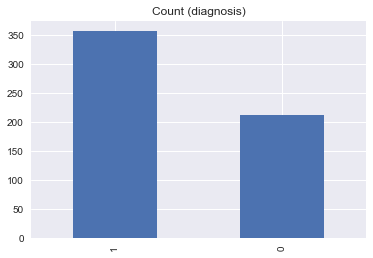

In [295]:
target_count = join_sq.diagnosis.value_counts()
target_count.plot(kind='bar', title='Count (diagnosis)');

In [296]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [297]:
label=join_sq.columns.drop(['id','diagnosis'])


In [298]:
X = join_sq[label]
y =  join_sq['diagnosis']

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [300]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [301]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.61%


Confusion matrix:
 [[37  5]
 [ 0 72]]


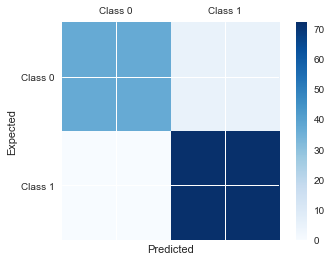

In [302]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [303]:
# Class count
count_class_1, count_class_0 = join_sq.diagnosis.value_counts()

# Divide by class
df_class_0 = join_sq[data3['diagnosis'] == 0]
df_class_1 = join_sq[data3['diagnosis'] == 1]

In [304]:
join_sq.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [581]:
df_class_0.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
257,886776,0,15.32,17.27,103.2,713.3,0.1335,0.2284,0.2448,0.12420,...,17.73,22.66,119.8,928.8,0.1765,0.4503,0.4429,0.2229,0.3258,0.11910
28,852973,0,15.30,25.27,102.4,732.4,0.1082,0.1697,0.1683,0.08751,...,20.27,36.71,149.3,1269.0,0.1641,0.6110,0.6335,0.2024,0.4027,0.09876
56,857637,0,19.21,18.57,125.5,1152.0,0.1053,0.1267,0.1323,0.08994,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294


In [305]:
df_class_1_under = df_class_1.sample(count_class_0)


Random under-sampling:
1    212
0    212
Name: diagnosis, dtype: int64


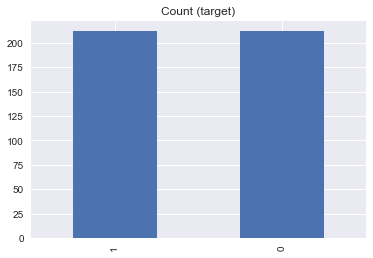

In [307]:
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_under.diagnosis.value_counts())

df_test_under.diagnosis.value_counts().plot(kind='bar', title='Count (target)');

In [308]:
df_test_under.diagnosis.value_counts()

1    212
0    212
Name: diagnosis, dtype: int64

In [309]:
df_test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 52 to 567
Data columns (total 39 columns):
id                                                   424 non-null int64
radius_mean_sq_norm                                  424 non-null float64
texture_mean_sq_norm                                 424 non-null float64
perimeter_mean_sq_norm                               424 non-null float64
area_mean_sq_norm                                    424 non-null float64
smoothness_mean_sq_norm                              424 non-null float64
compactness_mean_sq_norm                             424 non-null float64
concavity_mean_sq_norm                               424 non-null float64
concave_points_mean_sq_norm                          424 non-null float64
symmetry_mean_sq_norm                                424 non-null float64
fractal_dimension_mean_sq_norm                       424 non-null float64
radius_se_sq_norm                                    424 non-null float64
texture_

In [310]:
from sklearn.model_selection import StratifiedShuffleSplit
rrr = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [311]:
for train_index, test_index in rrr.split(df_test_under, df_test_under["diagnosis"]):

    strat_train_set_6 = df_test_under.loc[train_index].fillna(0)
    strat_test_set_6 = df_test_under.loc[test_index].fillna(0)


In [312]:
X_train6 = strat_train_set_6.drop("diagnosis", axis=1).fillna(0)
y_train6 = strat_train_set_6["diagnosis"].copy().fillna(0)

X_test6 = strat_test_set_6.drop("diagnosis", axis=1).fillna(0)
y_test6 = strat_test_set_6["diagnosis"].copy().fillna(0)

In [313]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg10 = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg10.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.24250858410219023

In [316]:
three_x_lm12 = smf.ols(get_formula(_iteration_cols6), strat_train_set_6).fit()
rss = np.sum(three_x_lm12.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set_6.shape[0] - 8 - 1)))
print("R^2:", three_x_lm12.rsquared)

RSS: 33.994603935672465
RSE: 0.320957865335
R^2: 0.556318983053


In [317]:
lm_res = three_x_lm12.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4361,0.018,23.905,0.000,0.400,0.472
concave_points_mean_sq_norm,1.4063,0.394,3.565,0.000,0.630,2.182
radius_worst_sq_norm,4.4577,0.949,4.698,0.000,2.591,6.324
compactness_mean_norm,0.1450,0.305,0.476,0.634,-0.454,0.744
concavity_mean_norm,-1.6036,0.518,-3.097,0.002,-2.622,-0.585
concavity_se_norm,0.9653,0.724,1.334,0.183,-0.459,2.389
smoothness_se_norm,-0.5610,0.265,-2.117,0.035,-1.082,-0.040
radius_worst_norm,-5.2655,0.873,-6.028,0.000,-6.984,-3.547
concave_points_worst_sq_norm,-0.5502,0.213,-2.582,0.010,-0.969,-0.131


In [323]:
_iteration_cols7=['concave_points_mean_sq_norm','concave_points_mean_sq_norm','radius_worst_sq_norm','concavity_mean_norm','smoothness_se_norm','radius_worst_norm','concave_points_worst_sq_norm']


In [324]:
three_x_lm13 = smf.ols(get_formula(_iteration_cols7), strat_train_set_6).fit()
rss = np.sum(three_x_lm13.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set_6.shape[0] - 6 - 1)))
print("R^2:", three_x_lm13.rsquared)

RSS: 34.21500504534469
RSE: 0.321025301359
R^2: 0.553442415093


In [325]:
lm_res = three_x_lm13.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4332,0.018,23.948,0.000,0.398,0.469
concave_points_mean_sq_norm,1.1482,0.348,3.297,0.001,0.463,1.833
radius_worst_sq_norm,4.6621,0.934,4.993,0.000,2.826,6.499
concavity_mean_norm,-1.0152,0.317,-3.201,0.002,-1.639,-0.391
smoothness_se_norm,-0.5054,0.262,-1.927,0.055,-1.021,0.011
radius_worst_norm,-5.5322,0.854,-6.476,0.000,-7.213,-3.852
concave_points_worst_sq_norm,-0.5605,0.189,-2.967,0.003,-0.932,-0.189


In [326]:
_iteration_cols8=['concave_points_mean_sq_norm','concave_points_mean_sq_norm','radius_worst_sq_norm','concavity_mean_norm','radius_worst_norm','concave_points_worst_sq_norm']


In [327]:
three_x_lm14 = smf.ols(get_formula(_iteration_cols8), strat_train_set_6).fit()
rss = np.sum(three_x_lm14.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (strat_train_set_6.shape[0] - 5 - 1)))
print("R^2:", three_x_lm14.rsquared)

RSS: 34.59766232343936
RSE: 0.322330395486
R^2: 0.548448158634


In [328]:
lm_res = three_x_lm14.summary()
lm_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4311,0.018,23.779,0.000,0.395,0.467
concave_points_mean_sq_norm,1.1933,0.349,3.421,0.001,0.507,1.880
radius_worst_sq_norm,4.1376,0.897,4.614,0.000,2.374,5.902
concavity_mean_norm,-1.2220,0.300,-4.078,0.000,-1.811,-0.633
radius_worst_norm,-4.9426,0.801,-6.172,0.000,-6.518,-3.367
concave_points_worst_sq_norm,-0.4953,0.187,-2.654,0.008,-0.862,-0.128


In [329]:
sub_X_train_prepared = X_train6[_iteration_cols8].values
sub_X_test_prepared = X_test6[_iteration_cols8].values

In [330]:
lin_reg = LinearRegression().fit(sub_X_train_prepared, y_train6)
y_pred = lin_reg.predict(sub_X_test_prepared)
mse = mean_squared_error(y_test6, y_pred)
rmse = np.sqrt(mse)
k_r2=lin_reg.score(sub_X_train_prepared, y_train6)
print(rmse)
print(k_r2)

0.360441678509
0.548448158634


In [ ]:
#результат хуже